In [125]:
import pandas as pd

In [126]:
data_df = pd.read_csv('oils-essential_oils.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imageBLUE LOTUS OIL PURE N...",EditSell SimilarExclude listing,$18.53Fixed price,$0.00100% Free shipping,67,"$1,241.28",–,"Mar 20, 2024"
1,1,", preview full size image4 fl oz GreenHealth L...",EditSell SimilarExclude listing,$10.51Fixed price,$0.00100% Free shipping,"3,063","$32,193.66",–,"Mar 20, 2024"
2,2,", preview full size image4 fl oz Tea Tree Esse...",EditSell SimilarExclude listing,$13.52Fixed price,$18.07100% Free shipping,522,"$7,056.14",–,"Mar 20, 2024"
3,3,", preview full size image4 fl oz Eucalyptus Gl...",EditSell SimilarExclude listing,$10.65Fixed price,$0.00100% Free shipping,"1,820","$19,382.67",–,"Mar 20, 2024"
4,4,", preview full size image4 fl oz Orange Sweet ...",EditSell SimilarExclude listing,$10.53Fixed price,$20.9299% Free shipping,171,"$1,801.13",–,"Mar 20, 2024"
...,...,...,...,...,...,...,...,...,...
9995,45,", preview full size image10ML Essential Oil Se...",EditSell SimilarExclude listing,$13.99Fixed price,$0.00100% Free shipping,6,$83.94,–,"Feb 3, 2024"
9996,46,", preview full size imagePrettyCare Essential ...",EditSell SimilarExclude listing,$7.99Fixed price,$4.990% Free shipping,1,$7.99,–,"Feb 3, 2024"
9997,47,", preview full size imageEllia Essential Oil T...",EditSell SimilarExclude listing,$29.99Fixed price,$8.700% Free shipping,1,$29.99,–,"Feb 3, 2024"
9998,48,", preview full size imageYoung Living Essentia...",EditSell SimilarExclude listing,$54.99Fixed price,$0.00100% Free shipping,1,$54.99,–,"Feb 3, 2024"


In [127]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [128]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)

data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)

data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,BLUE LOTUS OIL PURE NATURAL ESSENTIAL PURE ORG...,18.53,1241.28,67.0,2024-03-20,0.00,"[BLUE, LOTUS, OIL, PURE, NATURAL, ESSENTIAL, P..."
1,4 fl oz GreenHealth Lavender Essential Oil w/ ...,10.51,32193.66,3063.0,2024-03-20,0.00,"[fl, oz, GreenHealth, Lavender, Essential, Oil..."
2,4 fl oz Tea Tree Essential Oil 100% Pure & Nat...,13.52,7056.14,522.0,2024-03-20,8.07,"[fl, oz, Tea, Tree, Essential, Oil, %, Pure, N..."
3,4 fl oz Eucalyptus Globulus Essential Oil Pure...,10.65,19382.67,1820.0,2024-03-20,0.00,"[fl, oz, Eucalyptus, Globulus, Essential, Oil,..."
4,4 fl oz Orange Sweet Essential Oil (100% Pure ...,10.53,1801.13,171.0,2024-03-20,0.93,"[fl, oz, Orange, Sweet, Essential, Oil, %, Pur..."
...,...,...,...,...,...,...,...
9995,10ML Essential Oil Set Aromatherapy Gift Kit P...,13.99,83.94,6.0,2024-02-03,0.00,"[Essential, Oil, Set, Aromatherapy, Gift, Kit,..."
9996,PrettyCare Essential Oil Roller Bottles & Acce...,7.99,7.99,1.0,2024-02-03,0.99,"[PrettyCare, Essential, Oil, Roller, Bottles, ..."
9997,Ellia Essential Oil Travel Gift Set HoMedics 3...,29.99,29.99,1.0,2024-02-03,0.70,"[Ellia, Essential, Oil, Travel, Gift, Set, HoM..."
9998,Young Living Essential Oil -Oola Finance- (5ml...,54.99,54.99,1.0,2024-02-03,0.00,"[Young, Living, Essential, Oil, -Oola, Finance..."


In [129]:
# Replace "Oils" with "Oil" in the 'title' column
data_df['Listing'] = data_df['Listing'].str.replace(r'Oils\b', 'Oil')

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_9280/61163208.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['Listing'] = data_df['Listing'].str.replace(r'Oils\b', 'Oil')


In [130]:
# Extract phrases that end with "Essential Oils" and assign to a new column
data_df['essential_oils_phrase'] = data_df['Listing'].str.extract(r'((?:\w+\s){1,2}Essential Oil[s]?)')

# Drop rows with missing values (if any)
data_df.dropna(subset=['essential_oils_phrase'], inplace=True)

data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,essential_oils_phrase
1,4 fl oz GreenHealth Lavender Essential Oil w/ ...,10.51,32193.66,3063.0,2024-03-20,0.00,"[fl, oz, GreenHealth, Lavender, Essential, Oil...",GreenHealth Lavender Essential Oil
2,4 fl oz Tea Tree Essential Oil 100% Pure & Nat...,13.52,7056.14,522.0,2024-03-20,8.07,"[fl, oz, Tea, Tree, Essential, Oil, %, Pure, N...",Tea Tree Essential Oil
3,4 fl oz Eucalyptus Globulus Essential Oil Pure...,10.65,19382.67,1820.0,2024-03-20,0.00,"[fl, oz, Eucalyptus, Globulus, Essential, Oil,...",Eucalyptus Globulus Essential Oil
4,4 fl oz Orange Sweet Essential Oil (100% Pure ...,10.53,1801.13,171.0,2024-03-20,0.93,"[fl, oz, Orange, Sweet, Essential, Oil, %, Pur...",Orange Sweet Essential Oil
5,Peppermint Essential Oil 4 oz Pure Natural wit...,10.22,70265.79,6875.0,2024-03-20,0.00,"[Peppermint, Essential, Oil, oz, Pure, Natural...",Peppermint Essential Oil
...,...,...,...,...,...,...,...,...
9995,10ML Essential Oil Set Aromatherapy Gift Kit P...,13.99,83.94,6.0,2024-02-03,0.00,"[Essential, Oil, Set, Aromatherapy, Gift, Kit,...",10ML Essential Oil
9996,PrettyCare Essential Oil Roller Bottles & Acce...,7.99,7.99,1.0,2024-02-03,0.99,"[PrettyCare, Essential, Oil, Roller, Bottles, ...",PrettyCare Essential Oil
9997,Ellia Essential Oil Travel Gift Set HoMedics 3...,29.99,29.99,1.0,2024-02-03,0.70,"[Ellia, Essential, Oil, Travel, Gift, Set, HoM...",Ellia Essential Oil
9998,Young Living Essential Oil -Oola Finance- (5ml...,54.99,54.99,1.0,2024-02-03,0.00,"[Young, Living, Essential, Oil, -Oola, Finance...",Young Living Essential Oil


In [131]:
data_df.groupby(by='essential_oils_phrase').mean()

,Avg_Sold_Price,Total_Sales,Total_Sold,Shipping
essential_oils_phrase,,,,
001 Jasmine Essential Oil,22.990000,22.990000,1.000000,1.60
09 with Essential Oil,11.950000,47.800000,4.000000,0.53
1 Essential Oil,18.826667,29.353333,1.666667,0.30
1 oz Essential Oil,9.080000,410.275000,34.000000,0.00
10 Essential Oil,34.990000,34.990000,1.000000,0.00
...,...,...,...,...
with Thieves Essential Oil,18.990000,18.990000,1.000000,1.60
x 15ml Essential Oil,9.980000,19.960000,2.000000,0.00
x H3cm Essential Oil,12.870000,38.610000,3.000000,5.00


In [138]:


avg_sold = data_df.groupby(by='essential_oils_phrase').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='essential_oils_phrase').sum()['Total_Sold']

total_sales = data_df.groupby(by='essential_oils_phrase').sum()['Total_Sales']

count = data_df.groupby(by='essential_oils_phrase').count()['Total_Sales']

ratio = total_sold / count

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count, 'Ratio': ratio}

trend_df = pd.DataFrame.from_dict(trend_dict)
trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Ratio
essential_oils_phrase,,,,,
001 Jasmine Essential Oil,22.990000,1.0,22.99,1,1.000000
09 with Essential Oil,11.950000,4.0,47.80,1,4.000000
1 Essential Oil,18.826667,5.0,88.06,3,1.666667
1 oz Essential Oil,9.080000,68.0,820.55,2,34.000000
10 Essential Oil,34.990000,1.0,34.99,1,1.000000
...,...,...,...,...,...
with Thieves Essential Oil,18.990000,1.0,18.99,1,1.000000
x 15ml Essential Oil,9.980000,2.0,19.96,1,2.000000
x H3cm Essential Oil,12.870000,3.0,38.61,1,3.000000


In [106]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')
from matplotlib import pyplot as plt

In [139]:
trend_df.sort_values(by='Avg_Sold', ascending=False).head(10)

,Avg_Sold,Total_Sold,Total_Sales,Count,Ratio
essential_oils_phrase,,,,,
Helichrysum 5ml Essential Oil,220.666667,10.0,1096.00,3,3.333333
Select 30 Essential Oil,219.995000,2.0,439.99,2,1.000000
Gallon Lavender Essential Oil,217.980000,18.0,3923.62,1,18.000000
Blue Lotus Essential Oil,193.096000,250.0,7756.93,5,50.000000
Wild Mastic Essential Oil,168.740000,1.0,168.74,1,1.000000
Melissa 5ml Essential Oil,160.000000,1.0,160.00,1,1.000000
Copper Essential Oil,150.000000,1.0,150.00,1,1.000000
Bulk Ravensara Essential Oil,141.990000,3.0,425.97,1,3.000000
Set 10 Essential Oil,138.850000,18.0,2499.26,1,18.000000


In [140]:
trend_df.sort_values(by='Total_Sold', ascending=False).head(15)

,Avg_Sold,Total_Sold,Total_Sales,Count,Ratio
essential_oils_phrase,,,,,
4 oz Essential Oil,14.725000,19499.0,283562.78,2,9749.500000
Peppermint Essential Oil,21.093000,14722.0,268981.42,40,368.050000
Bulk Essential Oil,19.439286,14054.0,291095.18,14,1003.857143
Tea Tree Essential Oil,15.639398,13758.0,209998.62,83,165.759036
10 mL Essential Oil,22.821667,10880.0,44071.35,36,302.222222
Young Living Essential Oil,29.922587,10183.0,246106.44,1036,9.829151
Pure Essential Oil,12.643140,9871.0,91255.72,258,38.259690
oz Peppermint Essential Oil,17.766667,6917.0,186333.20,9,768.555556
On Guard Essential Oil,22.348947,5438.0,107000.86,19,286.210526


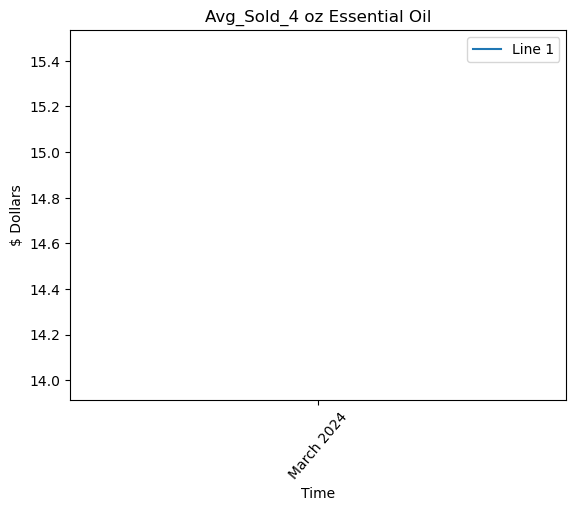

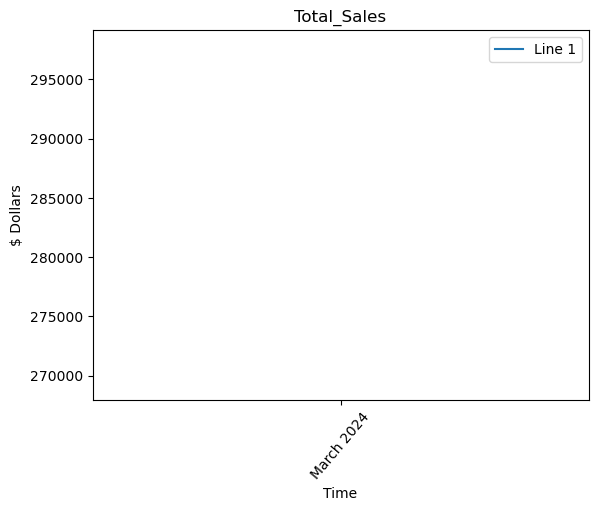

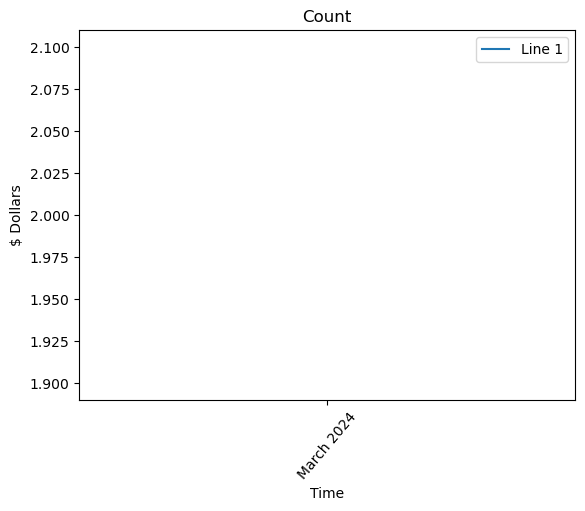

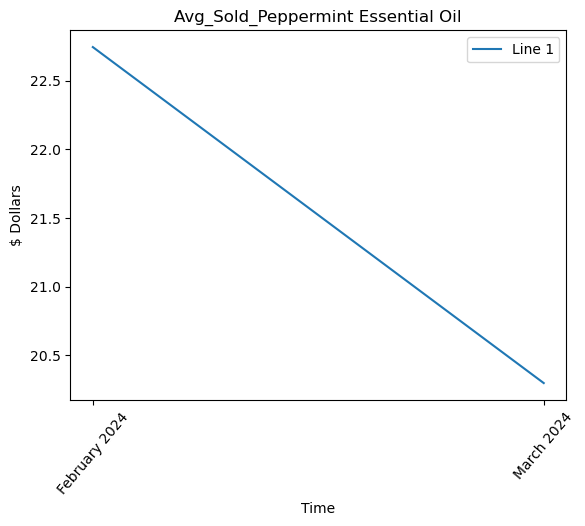

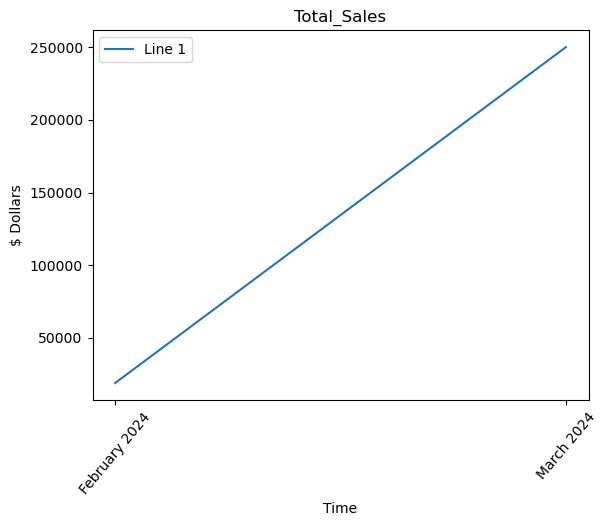

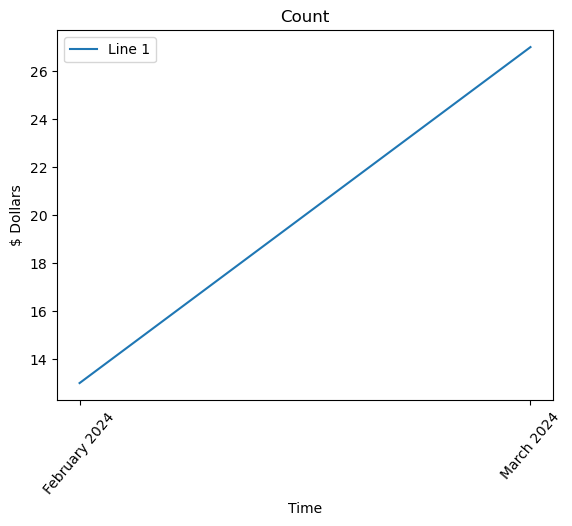

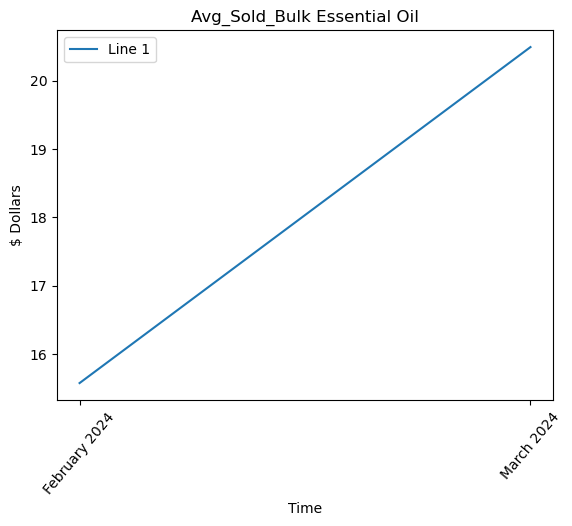

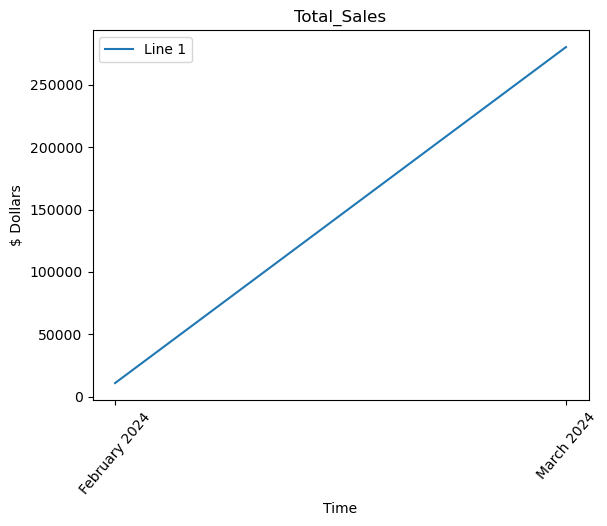

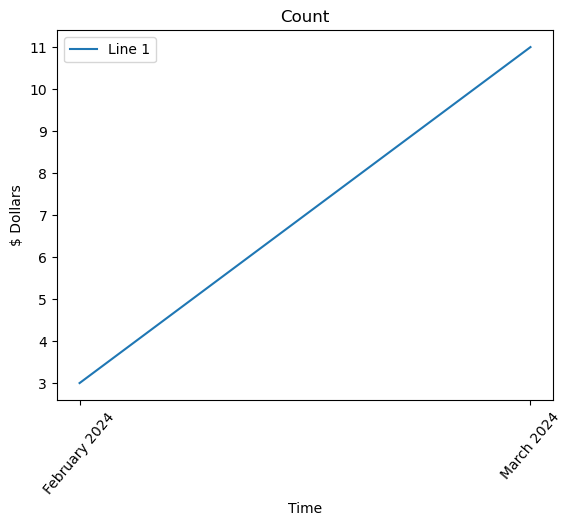

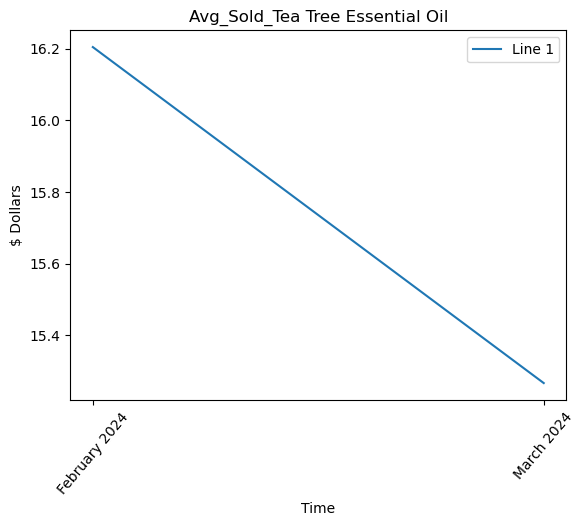

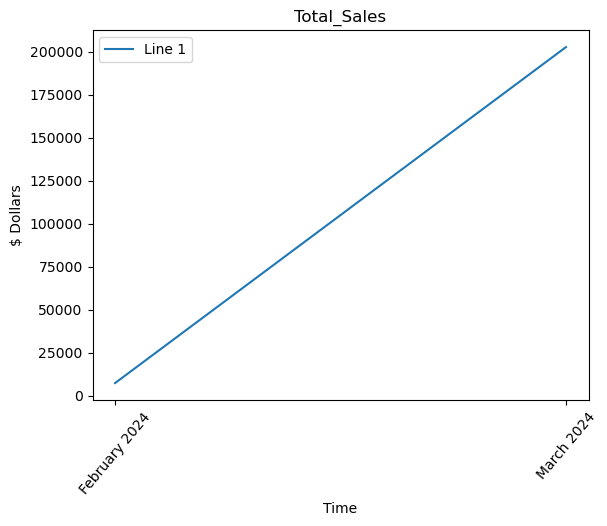

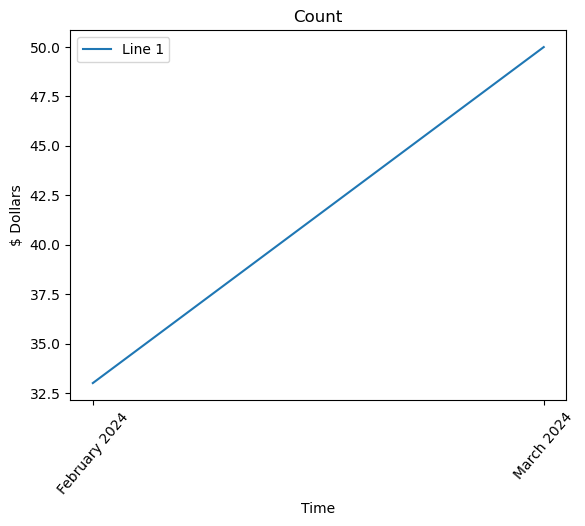

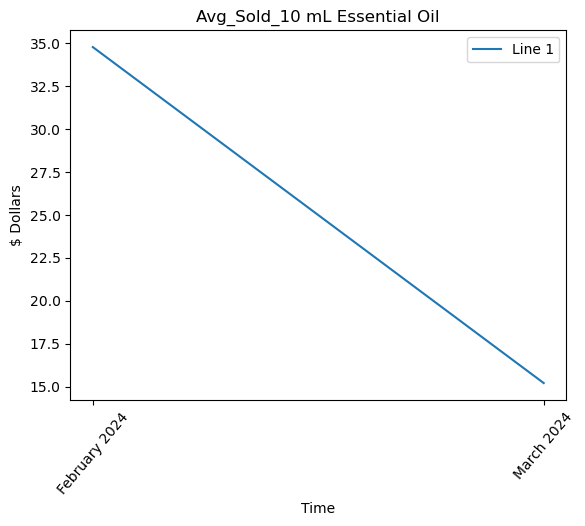

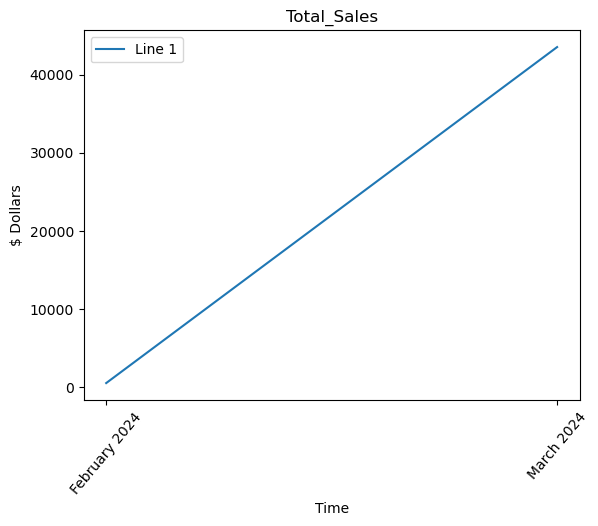

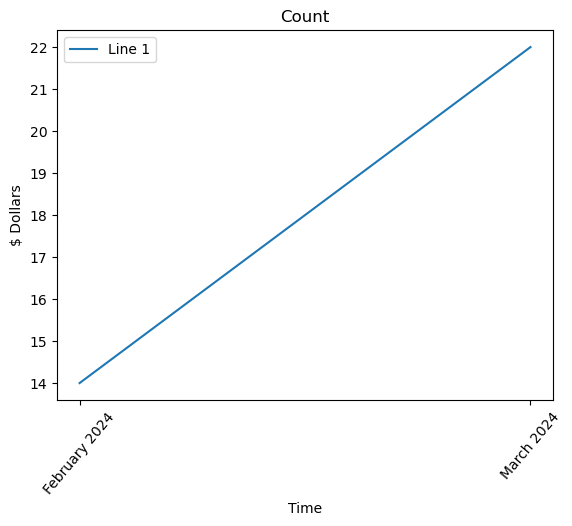

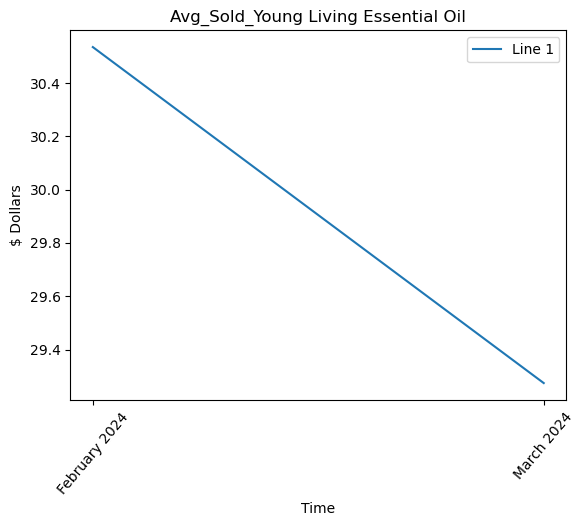

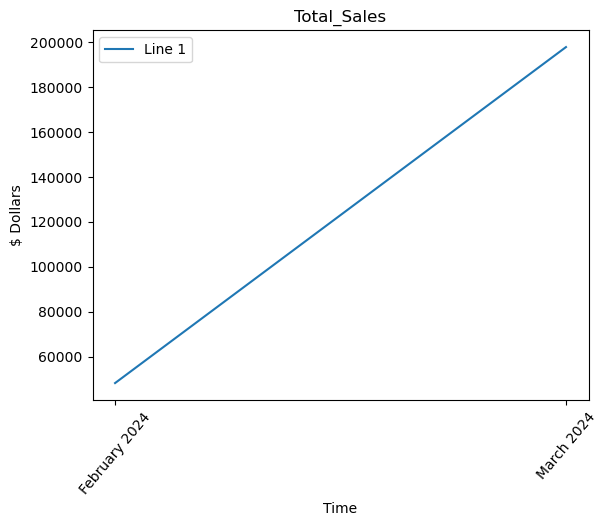

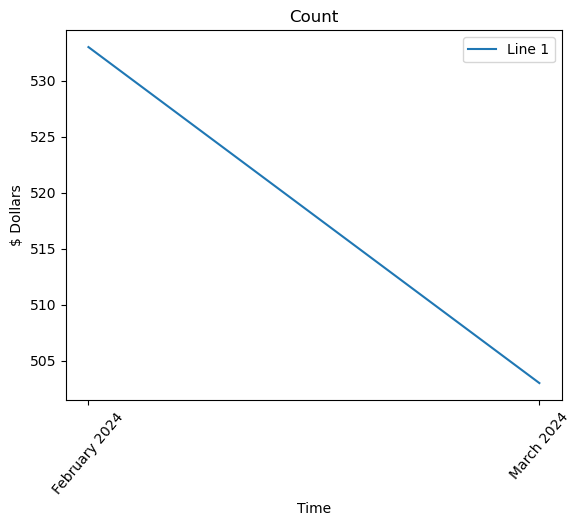

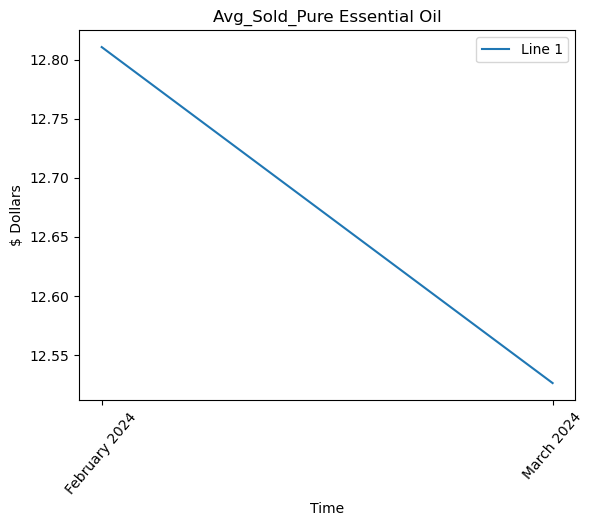

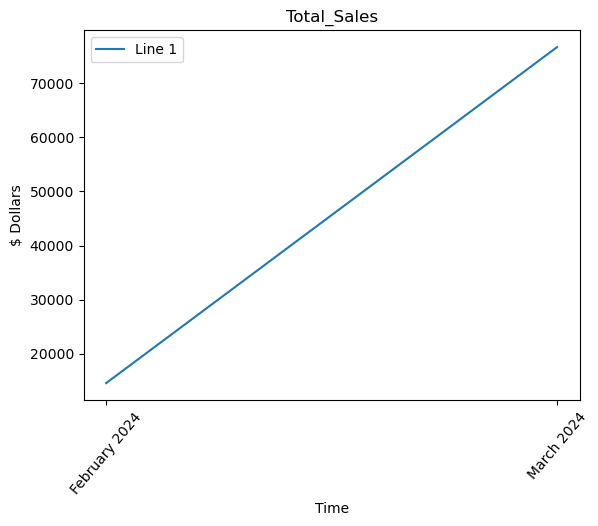

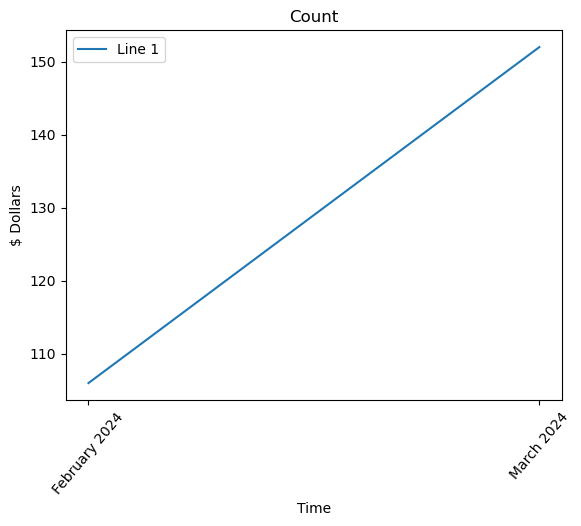

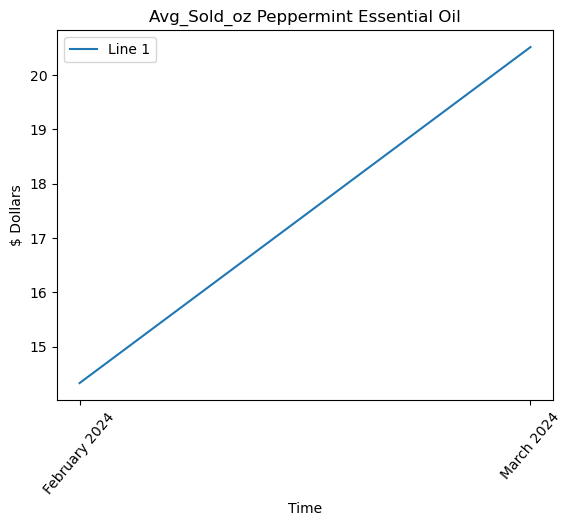

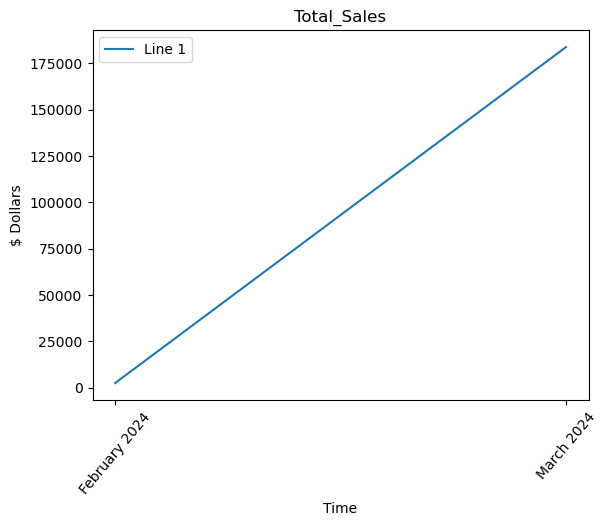

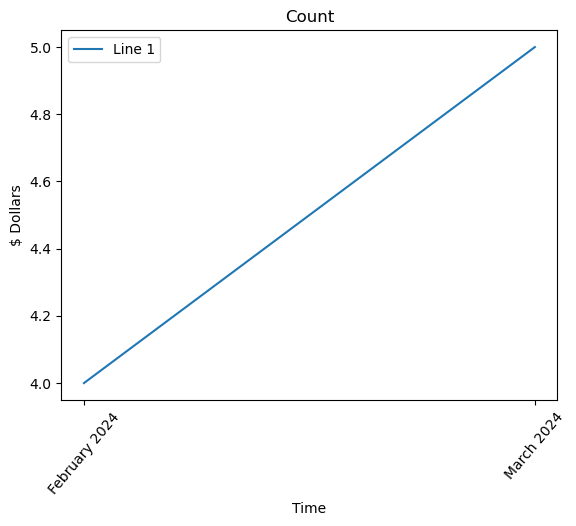

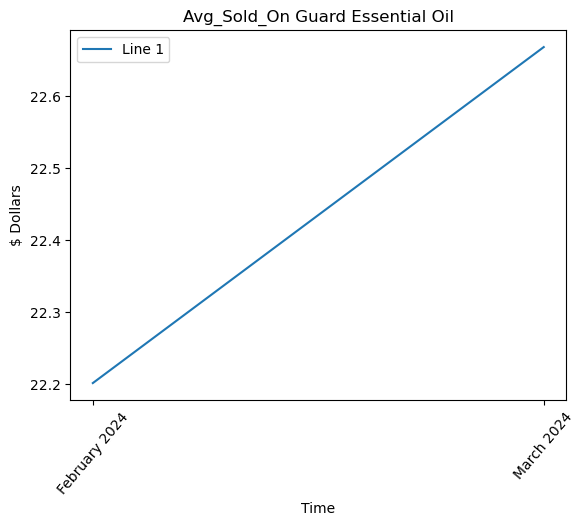

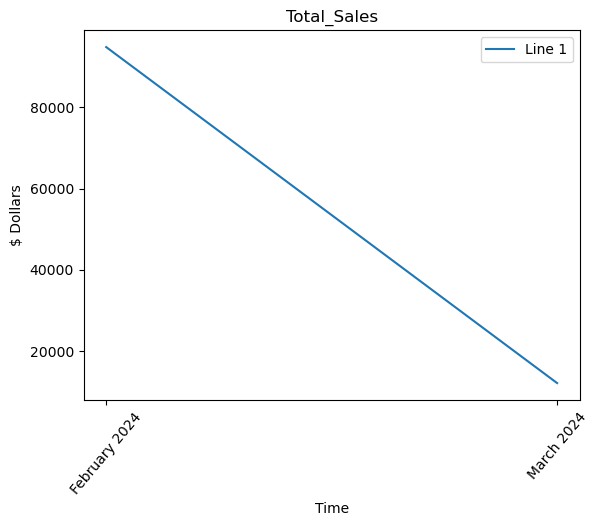

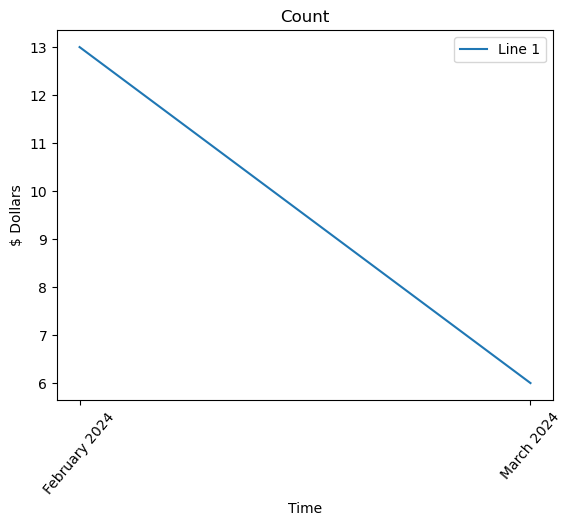

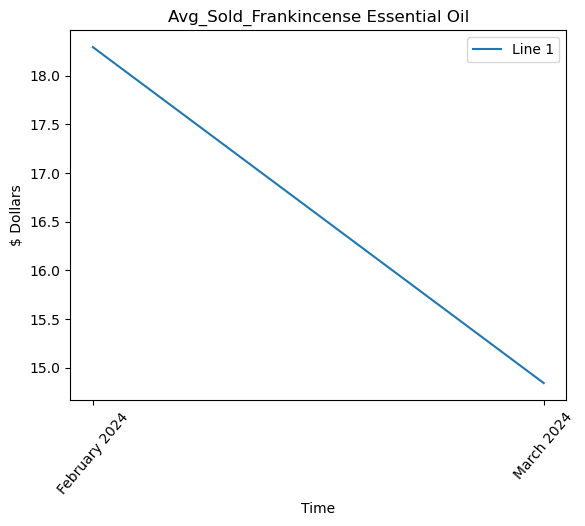

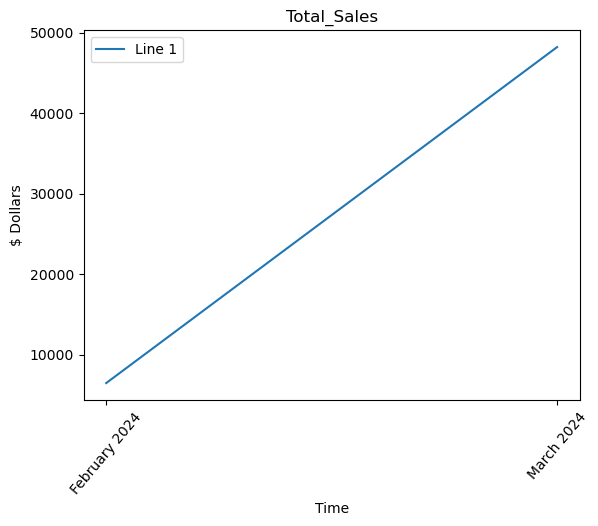

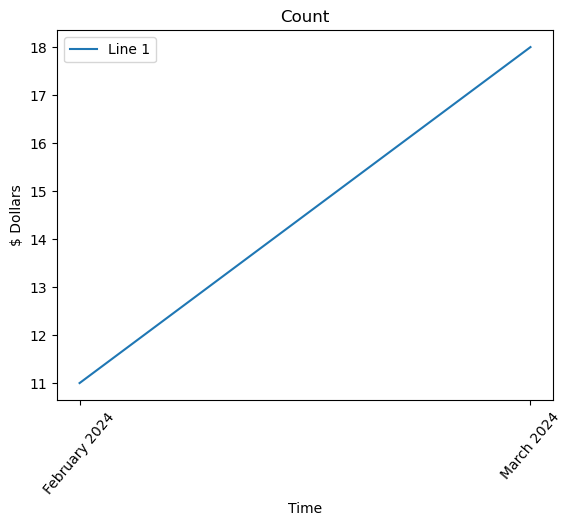

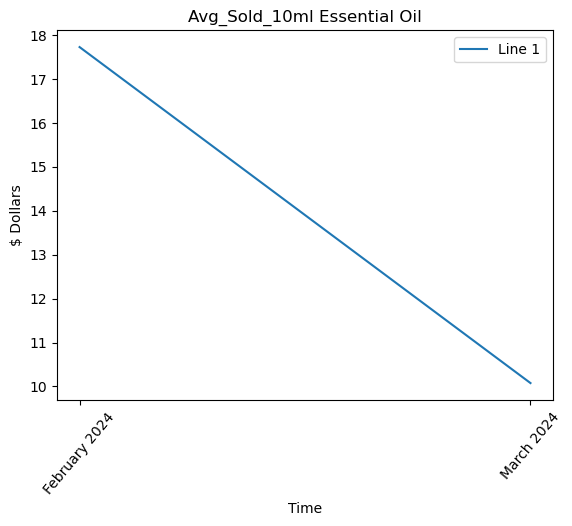

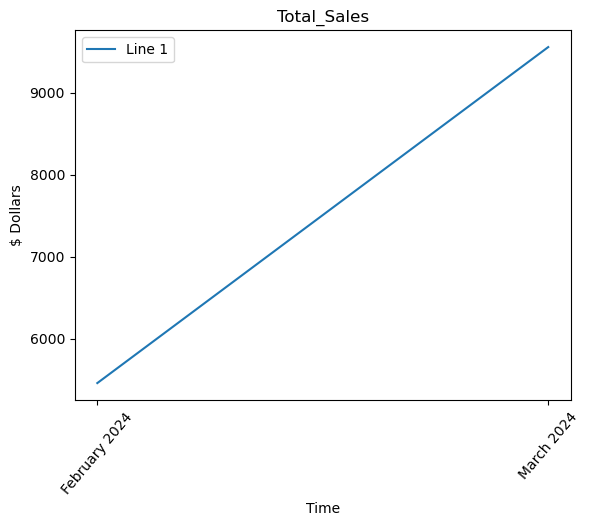

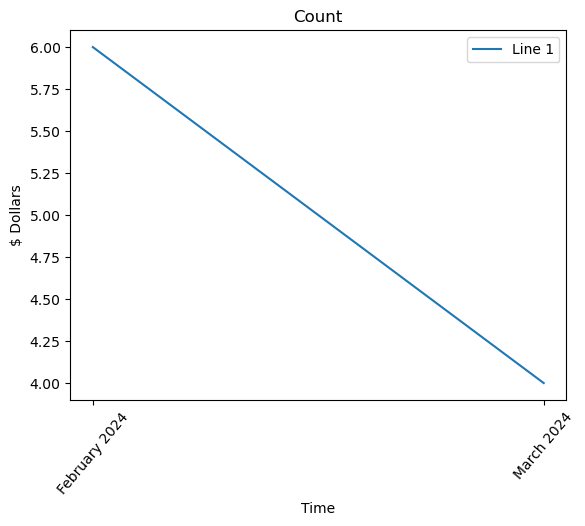

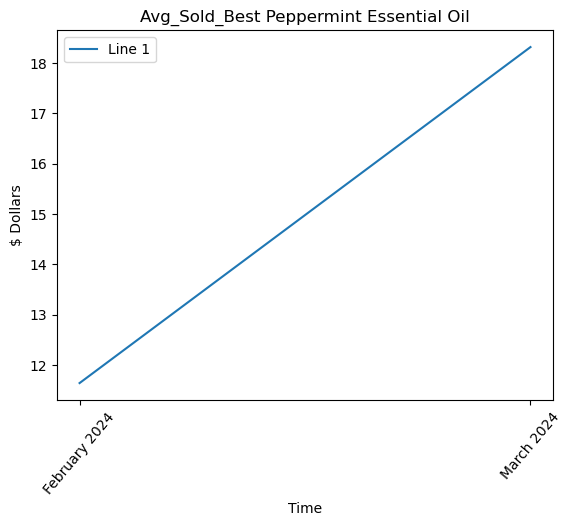

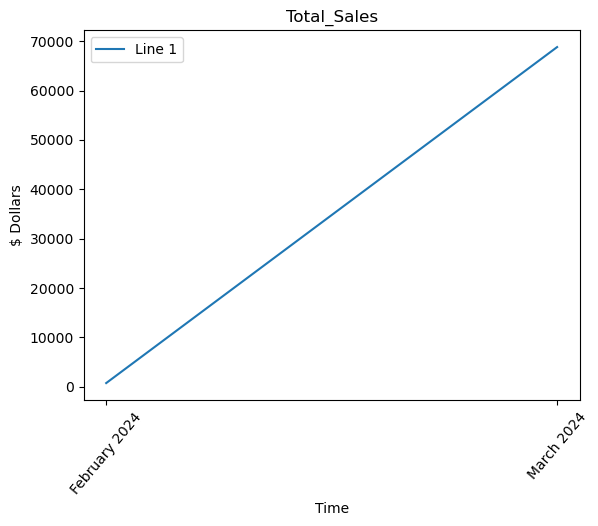

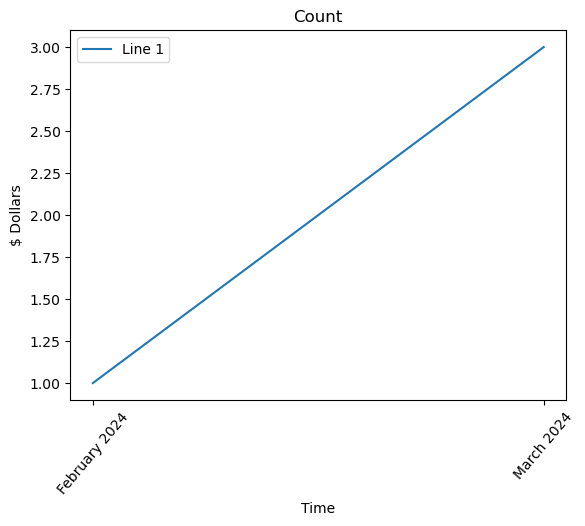

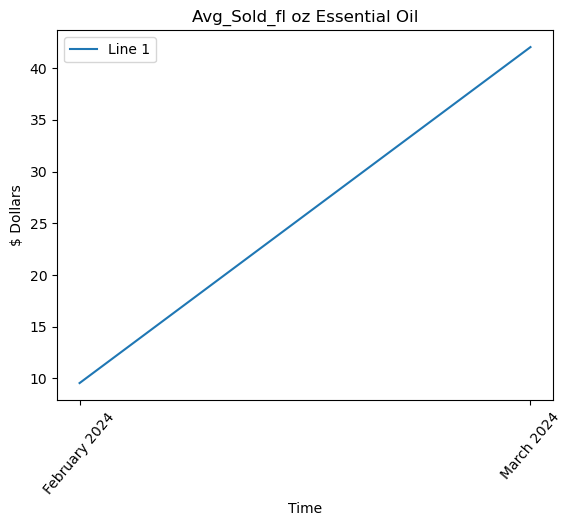

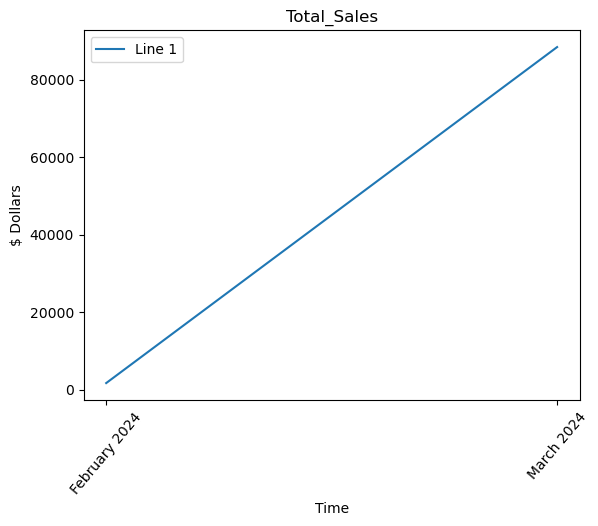

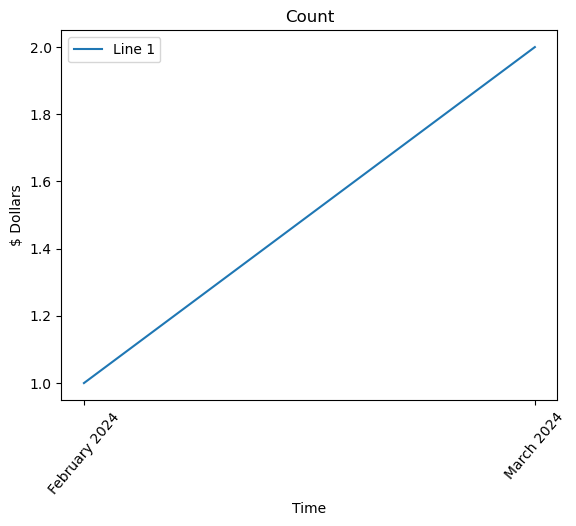

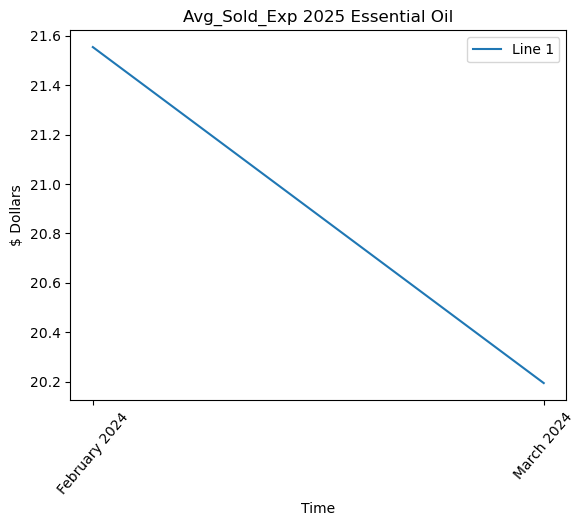

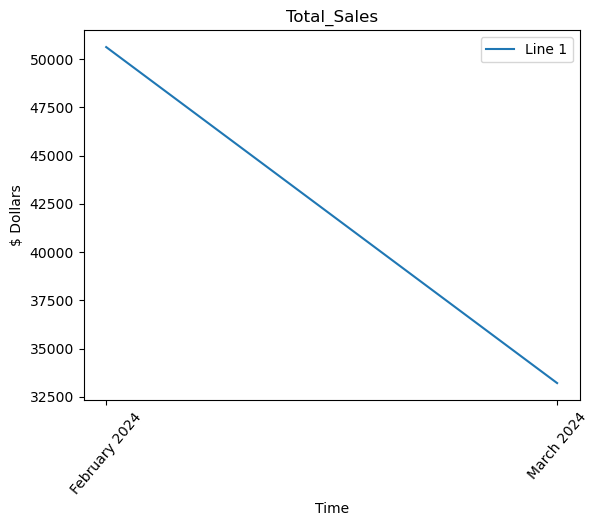

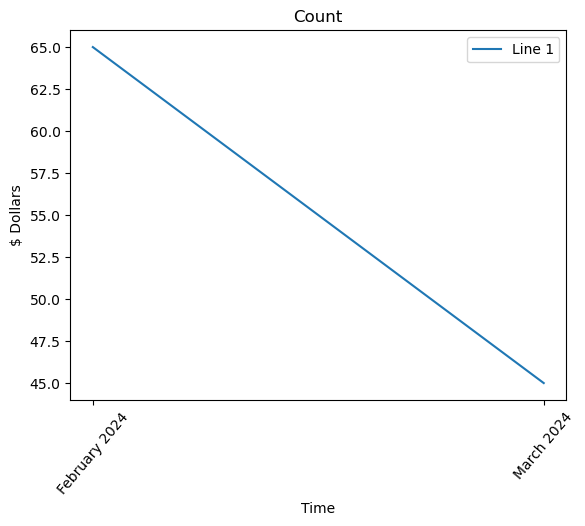

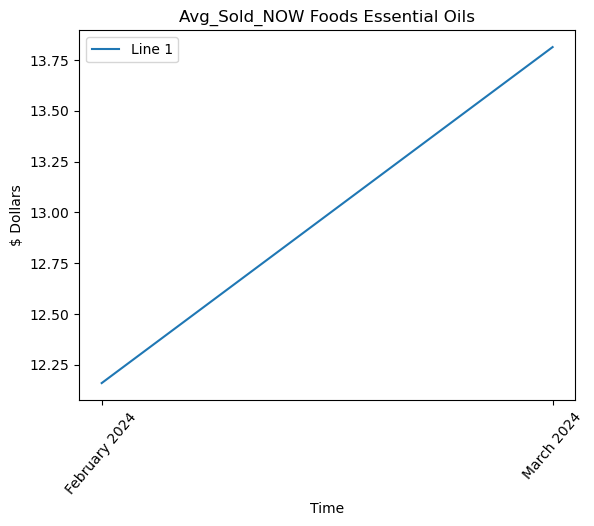

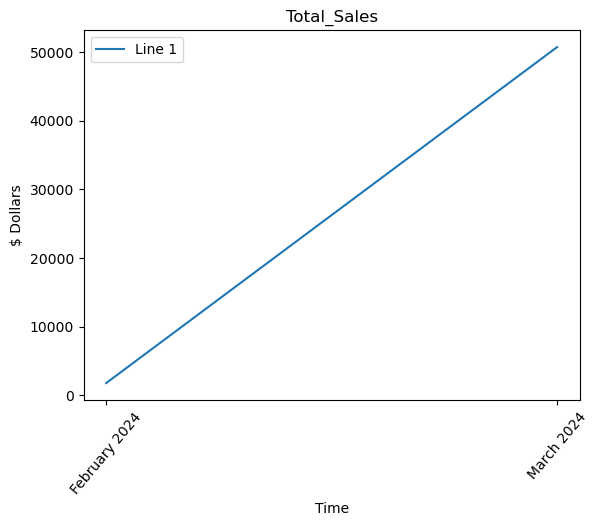

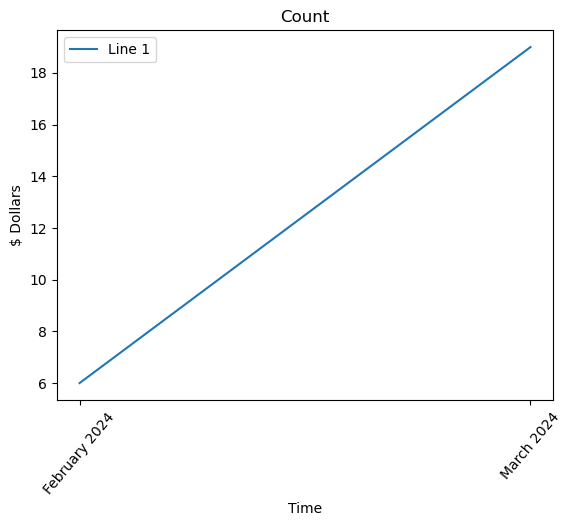

In [119]:
for product in prodcuts:
    
    filtered_df = data_df.loc[data_df['essential_oils_phrase'] == product]

    avg_sold = filtered_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

    total_sold = filtered_df.groupby(by='Month_Year').sum()['Total_Sold']

    total_sales = filtered_df.groupby(by='Month_Year').sum()['Total_Sales']
    
    count = filtered_df.groupby(by='Month_Year').count()['Total_Sales']

    trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

    trend_df = pd.DataFrame.from_dict(trend_dict)
    
    trend_df['Date'] = pd.to_datetime(trend_df.index)
    trend_df = trend_df.sort_values(by='Date')
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title(f'Avg_Sold_{product}')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title('Total_Sales')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title('Count')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

In [124]:
data_df.loc[data_df['essential_oils_phrase'] == '4 oz Essential Oil']

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,essential_oils_phrase,Month_Year
66,4 oz Essential Oil - 4 fl oz - 100% Pure and N...,14.38,213229.14,14833.0,2024-03-20,0.33,"[oz, Essential, Oils, fl, %, Pure, Natural, Th...",4 oz Essential Oil,March 2024
561,NOW Foods 4 oz Essential Oil (Packaging May Va...,15.07,70333.64,4666.0,2024-03-19,0.00,"[NOW, Foods, oz, Essential, Oils, Packaging, M...",4 oz Essential Oil,March 2024


In [121]:
product

'NOW Foods Essential Oils'

# Product_Research

In [39]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 20]
filtered_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
6,16 fl oz Peppermint Essential Oil 100% Pure - ...,27.71,164625.95,5942.0,2024-03-20,0.00,"[fl, oz, Peppermint, Essential, Oil, %, Pure, ..."
7,30-Pack 2 Oz Amber Glass Eye Dropper Bottles a...,26.35,11330.70,430.0,2024-03-20,0.00,"[30-Pack, Oz, Amber, Glass, Eye, Dropper, Bott..."
8,Young Living Thieves Essential Oil Blend 15mLY...,30.67,45144.12,1472.0,2024-03-20,4.42,"[Young, Living, Essential, Oil, Blend, Living,..."
9,Young Living PURIFICATION Pure Essential Oil B...,29.95,89.85,3.0,2024-03-20,0.00,"[Young, Living, PURIFICATION, Pure, Essential,..."
12,Young Living Thieves Pure Essential Oil Blend ...,29.90,2242.62,75.0,2024-03-20,0.00,"[Young, Living, Pure, Essential, Oil, Blend, m..."


In [40]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [41]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Essential Oil,4051
1,Young Living,1908
2,Living Essential,1324
3,Essential Oils,1066
4,Young Living Essential,830
5,100% Pure,703
6,Living Essential Oil,616
7,Living Essential Oils,590
8,Oil -,472
9,Oil Blend,409


In [42]:
# Filter rows where the string in the column does not contain certain words
filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(year|old|1|Year|Old|Toys|for|2|3|4|5|6|12|Months|Boys|Girls|Boy|Girl|Toddlers|Baby)\b')]

filt_df.head(20)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_9280/2958415260.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(year|old|1|Year|Old|Toys|for|2|3|4|5|6|12|Months|Boys|Girls|Boy|Girl|Toddlers|Baby)\b')]


,Name,Count
0,Essential Oil,4051
1,Young Living,1908
2,Living Essential,1324
3,Essential Oils,1066
4,Young Living Essential,830
5,100% Pure,703
6,Living Essential Oil,616
7,Living Essential Oils,590
8,Oil -,472
9,Oil Blend,409


In [43]:
# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Essential Oil')]
testing_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
6,16 fl oz Peppermint Essential Oil 100% Pure - ...,27.71,164625.95,5942.0,2024-03-20,0.00,"[fl, oz, Peppermint, Essential, Oil, %, Pure, ..."
7,30-Pack 2 Oz Amber Glass Eye Dropper Bottles a...,26.35,11330.70,430.0,2024-03-20,0.00,"[30-Pack, Oz, Amber, Glass, Eye, Dropper, Bott..."
8,Young Living Thieves Essential Oil Blend 15mLY...,30.67,45144.12,1472.0,2024-03-20,4.42,"[Young, Living, Essential, Oil, Blend, Living,..."
9,Young Living PURIFICATION Pure Essential Oil B...,29.95,89.85,3.0,2024-03-20,0.00,"[Young, Living, PURIFICATION, Pure, Essential,..."
12,Young Living Thieves Pure Essential Oil Blend ...,29.90,2242.62,75.0,2024-03-20,0.00,"[Young, Living, Pure, Essential, Oil, Blend, m..."
...,...,...,...,...,...,...,...
9978,Lot 3 NEW Young Living LEMON Essential Oils 15...,29.99,29.99,1.0,2024-02-03,0.00,"[Lot, NEW, Young, Living, LEMON, Essential, Oi..."
9981,*NEW* Young Living Essential Oil Blend - Sensa...,24.00,24.00,1.0,2024-02-03,0.95,"[*, NEW, *, Young, Living, Essential, Oil, Ble..."
9982,New Young Living White Angelica- 5ml Essential...,26.00,26.00,1.0,2024-02-03,0.55,"[New, Young, Living, White, Angelica-, Essenti..."
9997,Ellia Essential Oil Travel Gift Set HoMedics 3...,29.99,29.99,1.0,2024-02-03,0.70,"[Ellia, Essential, Oil, Travel, Gift, Set, HoM..."


In [44]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [45]:
most_common_words_df = pd.DataFrame(most_common_words, columns=['Name', 'Count'])
most_common_words_df.head(25)

,Name,Count
0,Essential,5554
1,Oil,4656
2,Living,2769
3,Young,2113
4,New,1479
5,Oils,1197
6,%,1182
7,Pure,1175
8,NEW,1021
9,*,705


In [51]:
# Filter rows where the string in the column does not contain certain words
filt_df = most_common_words_df[~most_common_words_df['Name'].str.contains(r'\b(%|New|Young|Oils|NEW|Essential|Oil|100%|Living|15|Pure|Sealed)\b')]

filt_df.head(20)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_9280/534122899.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filt_df = most_common_words_df[~most_common_words_df['Name'].str.contains(r'\b(%|New|Young|Oils|NEW|Essential|Oil|100%|Living|15|Pure|Sealed)\b')]


,Name,Count
6,%,1182
9,*,705
10,Blend,663
11,Exp,615
12,ml,612
14,Natural,538
15,doTERRA,537
16,FREE,488
17,oz,430
18,mL,389


In [20]:
# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

In [21]:
most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Essential Oil,8995
1,Young Living,2231
2,100% Pure,2149
3,Essential Oils,2031
4,Living Essential,1952
5,Young Living Essential,1243
6,Living Essential Oil,1025
7,Oil 100%,899
8,Essential Oil 100%,859
9,Living Essential Oils,838


In [56]:
# Filter rows where the string in the column does not contain certain words
filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(15ml|Free|FREE|ESSENTIAL|ml|mL|%|New|Young|Oils|NEW|Essential|Oil|100%|Living|15|Pure|Sealed)\b')]

filt_df.head(20)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_9280/2139201548.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(15ml|Free|FREE|ESSENTIAL|ml|mL|%|New|Young|Oils|NEW|Essential|Oil|100%|Living|15|Pure|Sealed)\b')]


,Name,Count
19,Therapeutic Grade,261
34,essential oil,180
41,& SEALED,165
42,fl oz,164
50,& Natural,151
62,- 100%,132
77,Tea Tree,115
88,Roll On,102
91,Natural Therapeutic,99
92,young living,99


In [12]:
# Filter the column containing the word "size"
# size_df = most_common_phrases_df[most_common_phrases_df['Name'].str.contains('Size')]

size_df = most_common_phrases_df

type_product = size_df['Name'].head(100).tolist()

In [28]:
type_product = ['Therapeutic Grade', 'Natural Therapeutic']

In [29]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [30]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = testing_df[testing_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
type_df = pd.DataFrame.from_dict(dict_sales)
type_df.head()

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Therapeutic,20.833600,13.19,24.95,500.0,0.0
1,Aromatherapy,18.870419,11.99,19.99,453.0,0.0


In [15]:
type_df.sort_values(by='Total_Sold', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Essential Oil,25.247198,14.530,27.9050,5895.0,0.0
1,Young Living,30.977717,17.990,31.9500,1774.0,0.0
2,100% Pure,19.815023,12.560,22.3800,1294.0,0.0
3,Essential Oils,27.901055,14.780,29.9900,1119.0,0.0
6,Living Essential Oil,32.341767,18.000,34.3350,968.0,0.0
4,Living Essential,32.341767,18.000,34.3350,968.0,0.0
17,Young Living Essential Oil,32.289835,18.000,34.1650,967.0,0.0
5,Young Living Essential,32.289835,18.000,34.1650,967.0,0.0
10,Oil -,28.872470,15.720,30.6125,664.0,0.0
11,Essential Oil -,28.968955,15.565,32.1750,651.0,0.0


In [16]:
type_df.sort_values(by='Avg_Sold_Price_mean', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
9,Living Essential Oils,34.364159,19.9500,36.0000,452.0,0.0
23,Young Living Essential Oils,34.257295,19.9500,36.0000,451.0,0.0
4,Living Essential,32.341767,18.0000,34.3350,968.0,0.0
6,Living Essential Oil,32.341767,18.0000,34.3350,968.0,0.0
17,Young Living Essential Oil,32.289835,18.0000,34.1650,967.0,0.0
5,Young Living Essential,32.289835,18.0000,34.1650,967.0,0.0
88,(5ml) New/Sealed,31.122323,16.1150,34.4900,155.0,0.0
1,Young Living,30.977717,17.9900,31.9500,1774.0,0.0
24,- New,30.672593,17.0000,29.9900,324.0,0.0
58,- New / Sealed!,30.510822,17.7925,28.9325,146.0,0.0


In [17]:
type_df.sort_values(by='Avg_Sold_Price_25', ascending=False)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
9,Living Essential Oils,34.364159,19.9500,36.0000,452.0,0.0
23,Young Living Essential Oils,34.257295,19.9500,36.0000,451.0,0.0
85,& SEALED,28.296306,18.0000,32.0000,111.0,0.0
89,NEW & SEALED,28.053545,18.0000,31.9975,110.0,0.0
4,Living Essential,32.341767,18.0000,34.3350,968.0,0.0
...,...,...,...,...,...,...
28,100% Pure Natural,15.526410,11.2825,14.4875,234.0,0.0
43,Essential Oil 100% Pure Natural,13.540127,11.1200,13.5400,157.0,0.0
41,Oil 100% Pure Natural,13.578182,11.1200,13.5500,165.0,0.0
90,Pure Natural Diffuser,12.133093,10.9900,12.6400,97.0,0.0
